# Machine learning assignment 2: Running a Random Forest

## Dataset: Bike sharing

I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out to casual users and registered users on specific hours of specific days, the weather on these days, whether the day was a workingday or not, etc. So far I have taken the number of rented out bikes as a response variable, but for this exercise I decided to flip that around and try to predict wether it was a working day or not based on the number of bikes rent out by casual and registered users.

 ## Loading data

In [39]:
%matplotlib inline
import numpy
import pandas
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier

data = pandas.read_csv('day.csv', low_memory=False)
print("Number of observations: ",len(data))
data.head()

Number of observations:  731


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Training the random forest tree

In [40]:
predictors = data[['casual','registered','temp','weathersit']]
targets = data.workingday
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [41]:
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)


## Evaluating the random forest

In [42]:
print("confusion matrix:\n",sklearn.metrics.confusion_matrix(tar_test,predictions))

confusion matrix:
 [[ 71  12]
 [  5 205]]


In [43]:
print("accuracy :",sklearn.metrics.accuracy_score(tar_test, predictions))

accuracy : 0.941979522184


In [44]:
print(classifier.feature_importances_)

[ 0.55805445  0.26601654  0.16264969  0.01327932]


## Accuracy of different numbers of trees

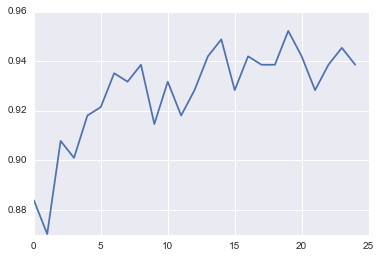

In [45]:
trees=range(25)
accuracy=numpy.zeros(25)

for i in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=i + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[i]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy);

## Summary
The most important features to predict whether it was weekday are (in this order) the number of bikes rent by casual users, the number of bikes rent by registered users, the temperature and the weather situation.

Growing multiple trees improved the accuracy of the model, but it seems that after 6 trees not much accuracy gain is achieved.